In [146]:
#1.a_1
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
pts = np.loadtxt('usincmoms.txt')
df= DataFrame(pts, columns=['Percentage','Income'])
df.describe()

,Percentage,Income
count,42.000000,42.000000
mean,0.023810,107738.095238
std,0.018139,67419.350021
min,0.002577,2500.000000
25%,0.007815,53750.000000
50%,0.019920,105000.000000
75%,0.036249,156250.000000
max,0.058859,300000.000000


<IPython.core.display.Javascript object>


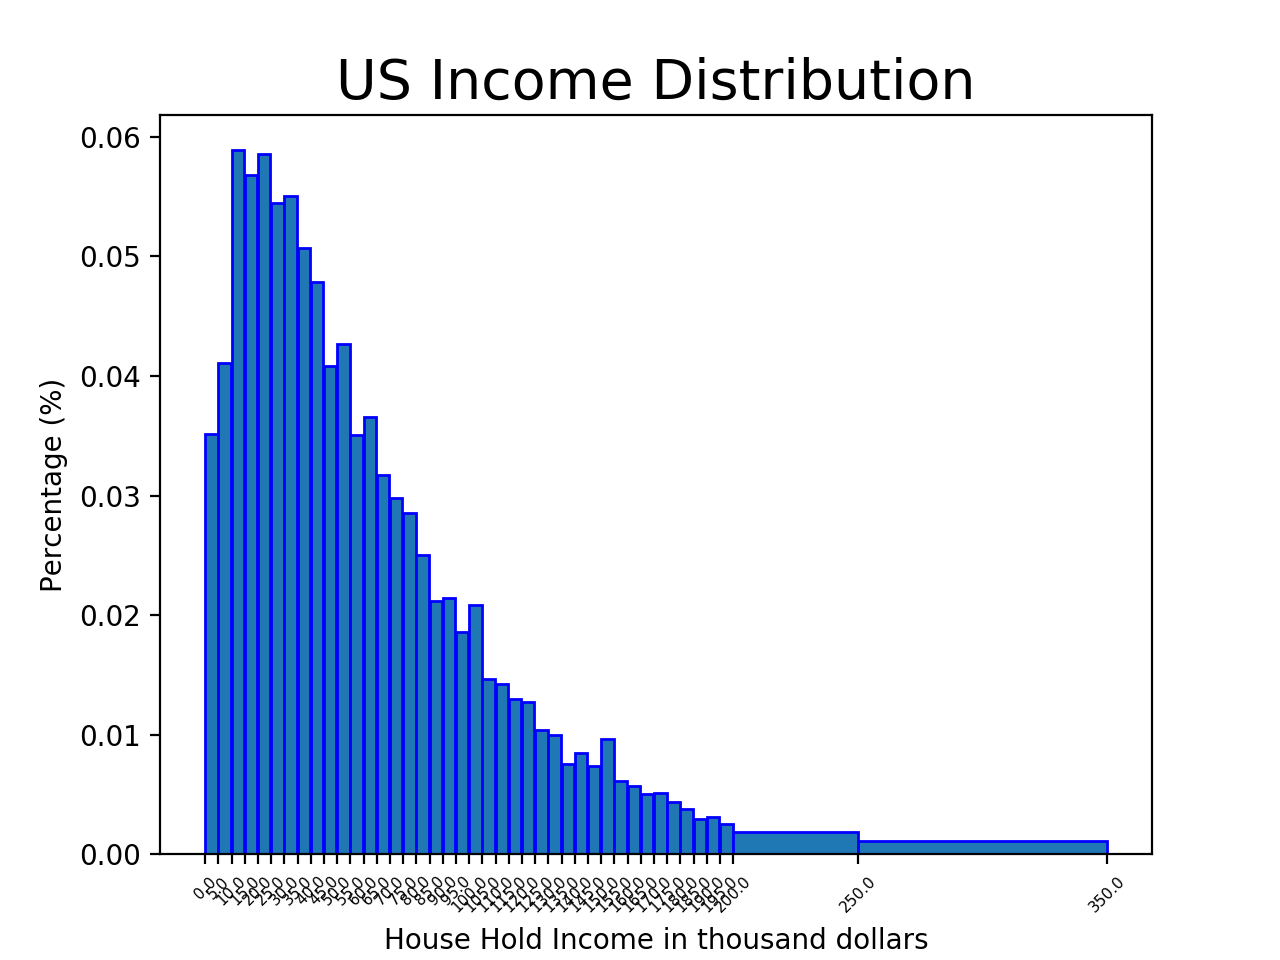

In [147]:
#1.a_2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
height_1=np.append(pts[:40,0],[pts[40,0]/10,pts[41,0]/20,0])
#Value of 41st bar is divided by 10.
#Value of 42nd bar is divided by 20
N=len(pts)
plt.figure()
tick_1=np.append(np.array(pts[:40,1]/1000-2.5),[200,250,350])
width_1=np.append(np.linspace(2.9,2.9,40),[2.9*10,2.9*20,0])
ypos_1=np.append(np.linspace(0,123,41),[152,210])
plt.bar(ypos_1,height=height_1,width=width_1,edgecolor='blue',align='edge') 
plt.title('US Income Distribution', fontsize=20)
plt.xlabel('House Hold Income in thousand dollars')
plt.ylabel('Percentage (%)')
plt.xticks(ypos_1,tick_1,fontsize=5.5, rotation=45)
plt.show()

In [148]:
#1.b_1
import scipy.optimize as opt
import scipy.integrate as intgr
import scipy.stats as sts
tick2 = np.append(np.array(pts[:40,1]/1000+2.5),[250,350])
tick3 = np.append(np.array(pts[:40,1]/1000-2.5),[200,250])

def model_moment(mu,sig):
    pb1 = sts.lognorm.cdf(tick2, sig, scale = np.exp(mu))
    pb2 = sts.lognorm.cdf(tick3, sig, scale = np.exp(mu))
    return pb1 - pb2

def err_vec(xvals, mu, sigma):
    data = xvals
    model = model_moment(mu,sigma)
    err_vec = data - model
    return err_vec

def criterion(params, *args):
    mu, sig = params
    xvals, W = args
    err = err_vec(xvals, mu, sig)
    crit_val = err.T @ W @ err
    return crit_val

mu_init = np.log(pts[:,1].mean())
sig_init = np.log(pts[:,1].std())
params_init = np.array([mu_init, sig_init])
W = np.diag(pts[:,0])
gmm_args = (pts[:,1], W)

result = opt.minimize(criterion, params_init, args = (gmm_args), method = 'L-BFGS-B', bounds = ((None,None),(1e-10,None)))
mu_GMM1, sig_GMM1 = result.x


mean_data=pts[:,1].mean()
sig_data = pts[:,1].std()
pdf = model_moment(mu_GMM1, sig_GMM1)
err1 = err_vec(pts[:,1], mu_GMM1, sig_GMM1)

print(result)
print('Mean of points =', mean_data, ', STD of points =', sig_data)
print('Error vector=', err1)
print('mu_GMM1=', mu_GMM1, ' sig_GMM1=', sig_GMM1)

      fun: 8163657243.6806479
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 3
      nit: 0
   status: 0
  success: True
        x: array([ 11.58745852,  11.10663857])
Mean of points = 107738.095238 , STD of points = 66611.9035279
Error vector= [   2499.81550943    7499.98290612   12499.98957507   17499.99241586
   22499.99401148   27499.99503917   32499.99575854   37499.99629128
   42499.99670224   47499.99702921   52499.99729576   57499.99751735
   62499.99770456   67499.99786489   72499.99800377   77499.99812529
   82499.99823253   87499.99832789   92499.99841326   97499.99849014
  102499.99855975  107499.99862308  112499.99868095  117499.99873404
  122499.99878294  127499.99882811  132499.99886998  137499.99890889
  142499.99894515  147499.99897903  152499.99901075  157499.99904052
  162499.99906851  167499.99909488  172499.99911977  177499.99914329
  182499.99916557  187

<IPython.core.display.Javascript object>


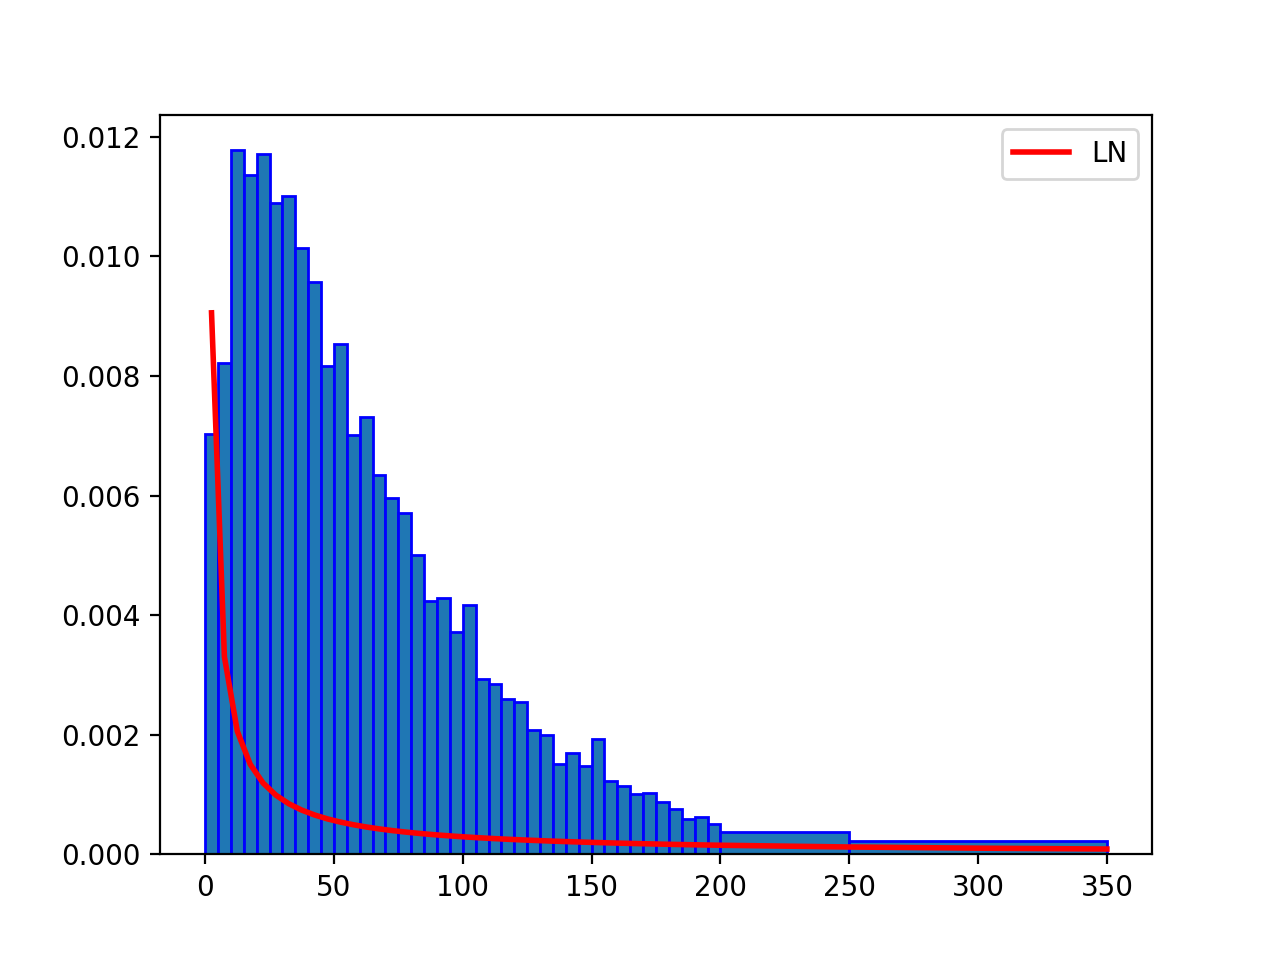

In [149]:
#1.b_2
plt.figure()
aaa=pts[0:42,1]/1000
bbb=np.append(pts[0:40,0]/5,[pts[40,0]/50,pts[41,0]/100])
ccc=np.append(np.linspace(5,5,40),[5*10,5*20])
data = np.append(pts[0:40,1]/1000, [200,250,300,350])
plt.bar(aaa, bbb, width =ccc , align = 'center', edgecolor='blue')
plt.plot(data, sts.lognorm.pdf(data, sig_GMM1, scale = np.exp(mu_GMM1)), color = 'r', linewidth = 2, label = 'LN')
plt.legend(loc = 'upper right')
plt.show()

In [150]:
#1.c_1
def model_moment2(alpha,beta):
    pb1 = sts.gamma.cdf(tick2, alpha, scale = beta)
    pb2 = sts.gamma.cdf(tick3, alpha, scale = beta)
    return pb1-pb2

def err_vec2(xvals, alpha, beta):
    data = xvals
    model = model_moment2(alpha,beta)
    err_vec = data - model
    return err_vec

def criterion2(params, *args):
    alpha, beta = params
    xvals, W = args
    err = err_vec2(xvals, alpha, beta)
    crit_val = err.T @ W @ err
    return crit_val

alpha2_init = 3
beta2_init = 20
params2_init = np.array([alpha2_init, beta2_init])
W = np.diag(pts[:,0])
gmm_args = (pts[:,1], W)

result2 = opt.minimize(criterion2, params2_init, args = (gmm_args), method = 'L-BFGS-B', bounds = ((1e-10,None),(1e-10,None)))
alpha_gmm2, beta_gmm2= result2.x
print(result2)

      fun: 8163654010.5355844
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 6
      nit: 1
   status: 0
  success: True
        x: array([  3.99454737,  19.89571415])


<IPython.core.display.Javascript object>


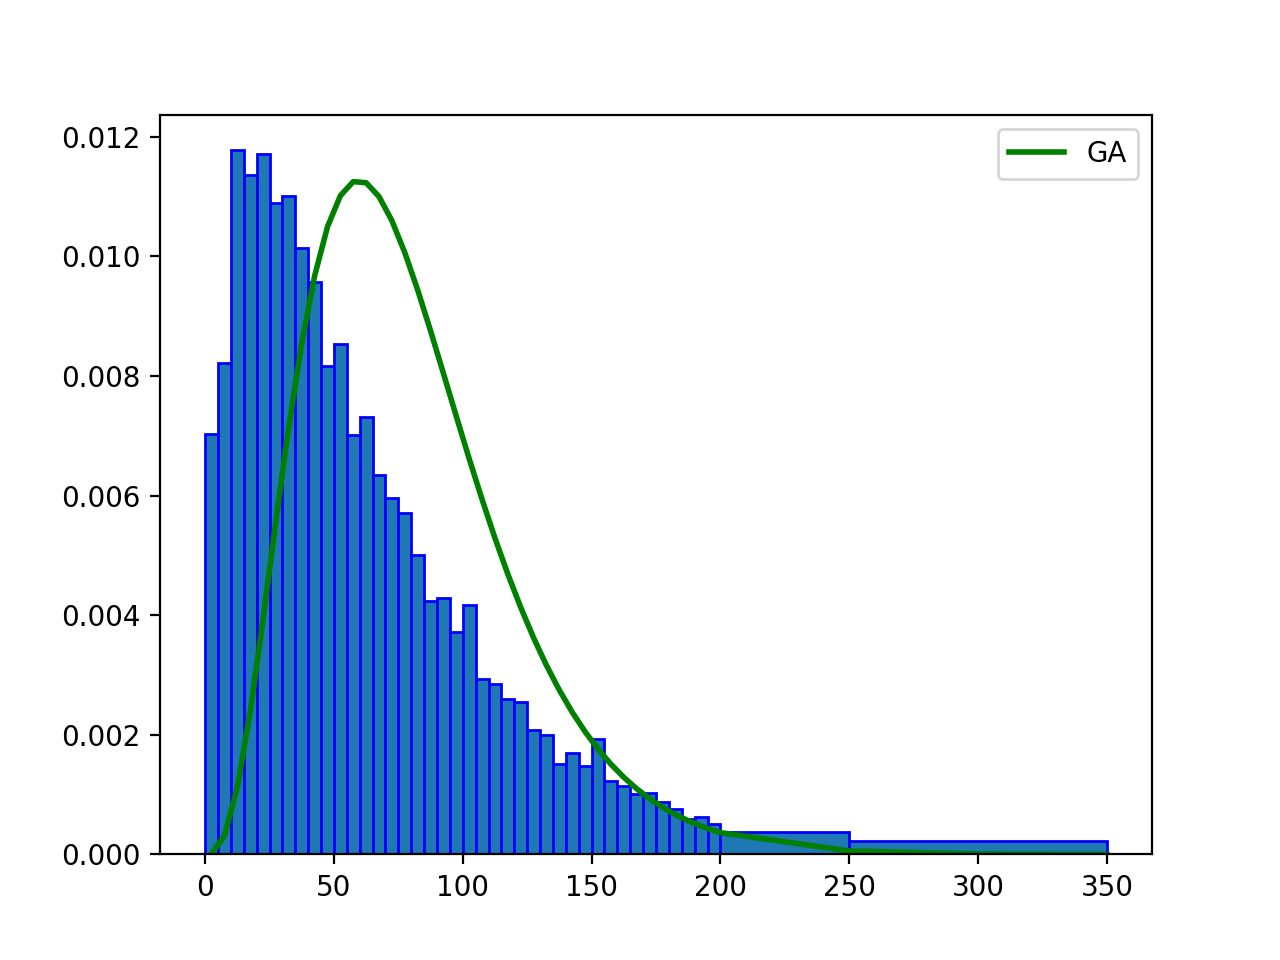

In [151]:
#1.c_2
plt.figure()
aaa=pts[0:42,1]/1000
bbb=np.append(pts[0:40,0]/5,[pts[40,0]/50,pts[41,0]/100])
ccc=np.append(np.linspace(5,5,40),[5*10,5*20])
data = np.append(pts[0:40,1]/1000, [200,250,300,350])
plt.bar(aaa, bbb, width =ccc , align = 'center', edgecolor='blue')
plt.plot(data, sts.gamma.pdf(data, alpha_gmm2, scale =beta_gmm2), color = 'g', linewidth = 2, label = 'GA')
plt.legend(loc = 'upper right')
plt.show()

<IPython.core.display.Javascript object>


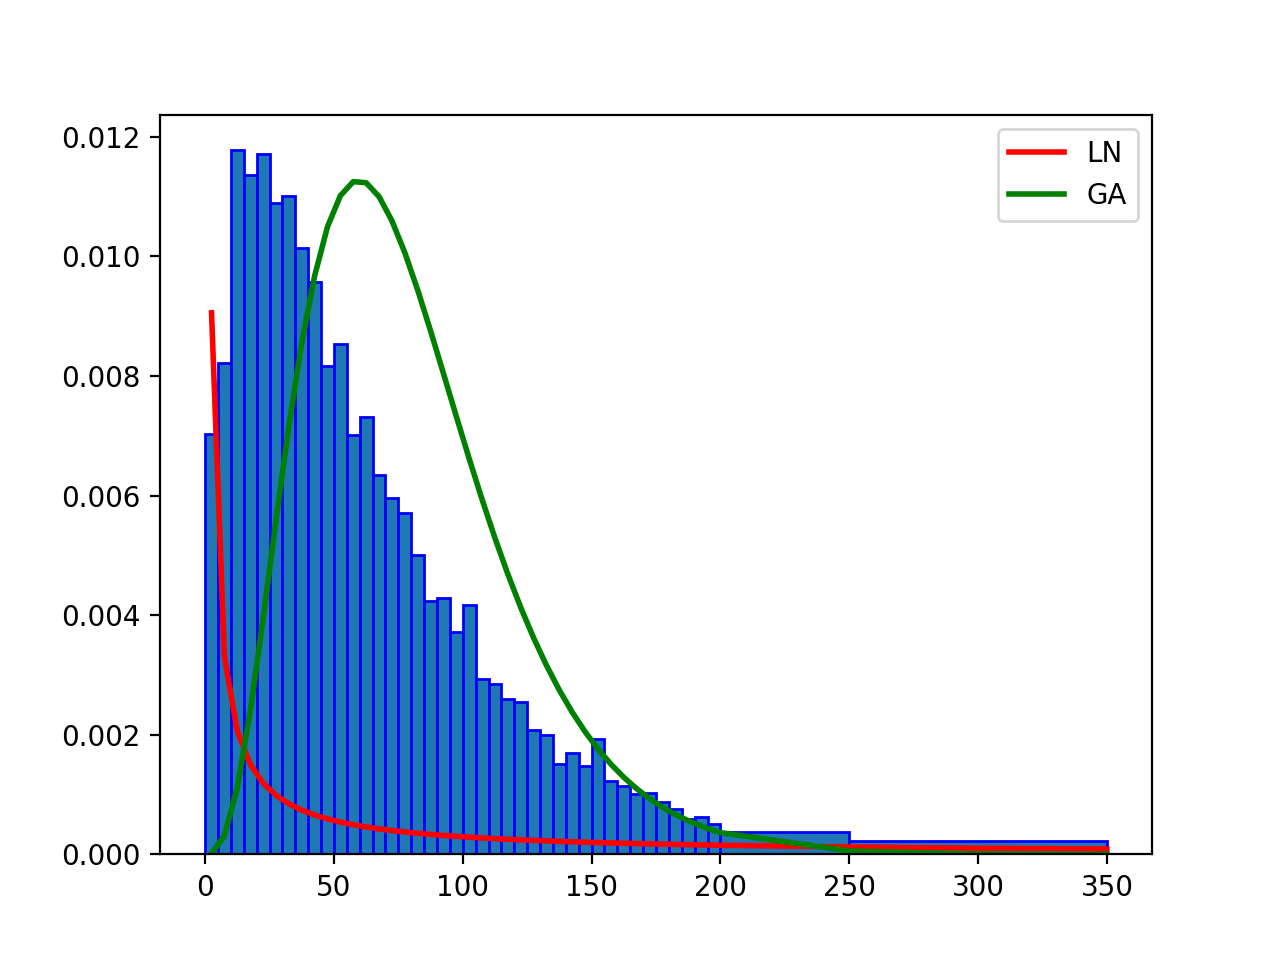

In [152]:
#1.d_1
plt.figure()
aaa=pts[0:42,1]/1000
bbb=np.append(pts[0:40,0]/5,[pts[40,0]/50,pts[41,0]/100])
ccc=np.append(np.linspace(5,5,40),[5*10,5*20])
data = np.append(pts[0:40,1]/1000, [200,250,300,350])
plt.bar(aaa, bbb, width =ccc , align = 'center', edgecolor='blue')
plt.plot(data, sts.lognorm.pdf(data, sig_GMM1, scale = np.exp(mu_GMM1)), color = 'r', linewidth = 2, label = 'LN')
plt.plot(data, sts.gamma.pdf(data, alpha_gmm2, scale =beta_gmm2), color = 'g', linewidth = 2, label = 'GA')
plt.legend(loc = 'upper right')
plt.show()

In [153]:
#1.d_2 
obj_val1 = result.fun
obj_val2 = result2.fun
print('Minimized Lognormal Objective =', obj_val1)
print('Minimized Gamma Objective =', obj_val2)
#The most precise way I guess is to compare their objective functions.
#From the graph and the test results shown above, Gamma Distribution fits the data better than Lognormal Distribution.

Minimized Lognormal Objective = 8163657243.68
Minimized Gamma Objective = 8163654010.54


In [154]:
#1.e_1
#First Step W
params3_init=[alpha_gmm2,beta_gmm2]
WI = np.identity(pts[:,1].shape[0])
gmm2s_args = (pts[:,1], WI)

result3 = opt.minimize(criterion2, params3_init, args = gmm2s_args, method = 'L-BFGS-B', bounds = ((1e-10,None),(1e-10,None)))
alpha_1, beta_1 = result3.x
err_vec3 = np.reshape(err_vec2(pts[:,1], alpha_1, beta_1),(42,1))
omega = (err_vec3 @ err_vec3.T) / pts[:,1].shape[0] 

#Second Step W
W2S = np.linalg.pinv(omega)
gmm2s2_args = (pts[:,1], W2S)
params4_init = np.array([alpha_1, beta_1])
result4 = opt.minimize(criterion2, params4_init, args = gmm2s2_args, method = 'L-BFGS-B', bounds = ((1e-10,None),(1e-10,None)), tol = 1e-10)
alpha_2, beta_2 = result4.x
print('Estimation Result')
print('')
print(result4)

Estimation Result

      fun: 41.999999999999616
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.,  0.])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 6
      nit: 1
   status: 0
  success: True
        x: array([ 10.36747289,  23.25523886])


In [155]:
#1.e_2
obj_val3 = result2.fun
obj_val4 = result4.fun
print('Minimized Gamma Objective =', obj_val3)
print('Minimized Gamma with 2-Step Objective =', obj_val4)
#Yes, alpha and beta change quite a bit. From (3.99, 19.90) to (10.37, 23.26).
#I compare the difference by comparing the number of their repective objective functions.

Minimized Gamma Objective = 8163654010.54
Minimized Gamma with 2-Step Objective = 42.0


In [302]:
#2. Brock and Mirman(1972) by GMM
pts2 = np.loadtxt('MacroSeries.txt', delimiter = ',')

def z_1(alpha, xvals):
    z = np.log(xvals[:,3]/(alpha*xvals[:,1]**(alpha-1)))
    return z

#Moment Conditions
def data_moment2(alpha, beta, rho, mu, xvals):
    z = z_1(alpha, xvals)
    z_t = z[1:100]
    z_t_1 = z[0:99]
    k_t = xvals[:,1][1:100] 
    c_t = xvals[:,0][1:100]
    c_t_1 = xvals[:,0][0:99]
    w_t_1 = xvals[:,2][0:99]
    m1 = (z_t - rho*z_t_1 - (1-rho)*mu).mean()
    m2 = ((z_t - rho*z_t_1 - (1-rho)*mu)*z_t).mean()
    m3 = (beta*alpha*np.exp(z_t)*k_t**(alpha-1)*c_t/c_t_1 - 1).mean()
    m4 = ((beta*alpha*np.exp(z_t)*k_t**(alpha-1)*c_t/c_t_1 - 1)*w_t_1).mean()    
    return m1, m2, m3, m4

def err_vec2(alpha, beta, rho, mu, xvals):
    m1, m2, m3, m4 = data_moment2(alpha, beta, rho, mu, xvals)
    err_vec = np.array([m1, m2, m3, m4])
    return err_vec.T

def criterion2(params, *args):
    alpha, beta, rho, mu = params
    xvals,W = args
    err = err_vec2(alpha, beta, rho, mu, xvals)
    crit_val = err.T @ W @ err
    return crit_val

#Initial Values
alpha_init2 = 0.30
beta_init2 = 0.85
rho_init2 = 0.85
mu_init2 = 9.5

#Identity Matrix
W = np.eye(4)
params_2 = np.array([alpha_init2, beta_init2, rho_init2, mu_init2])
gmm2_arg= (pts2,W)
result_2 = opt.minimize(criterion2, params_2, args = gmm2_arg, method = 'L-BFGS-B', bounds = ((1e-10, 1-1e-10),(1e-10, 1-1e-10),(-1+1e-10, 1-1e-10),(1e-10, None)))
alpha_gmm2, beta_gmm2, rho_gmm2, mu_gmm2 = result_2.x

#Result
print(result_2)
#Estimated Values
print('alpha_GMM =', alpha_gmm2,'beta_GMM =',beta_gmm2, 'rho_GMM =',rho_gmm2, 'mu_GMM =',mu_gmm2)
#Minimized Criterion Function
print('Minimized Criterion Function =', result_2.fun)

      fun: 0.0028615996557590918
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -2.45458058e-02,   1.41521080e+04,   8.62192739e-04,
        -1.66836033e-03])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 420
      nit: 42
   status: 0
  success: True
        x: array([ 0.45181387,  0.97404718,  0.93854795,  9.5017472 ])
alpha_GMM = 0.451813872989 beta_GMM = 0.97404718163 rho_GMM = 0.938547945341 mu_GMM = 9.50174719829
Minimized Criterion Function = 0.00286159965576
